In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

In [2]:
pd.set_option('float_format', '{:f}'.format)

In [92]:
dados = pd.read_csv(open(r"D:\João\MBA\Diversos\TCC\Base Tratada v1 - 20181202.txt", 'r', encoding='utf8'), sep=';', low_memory=False)

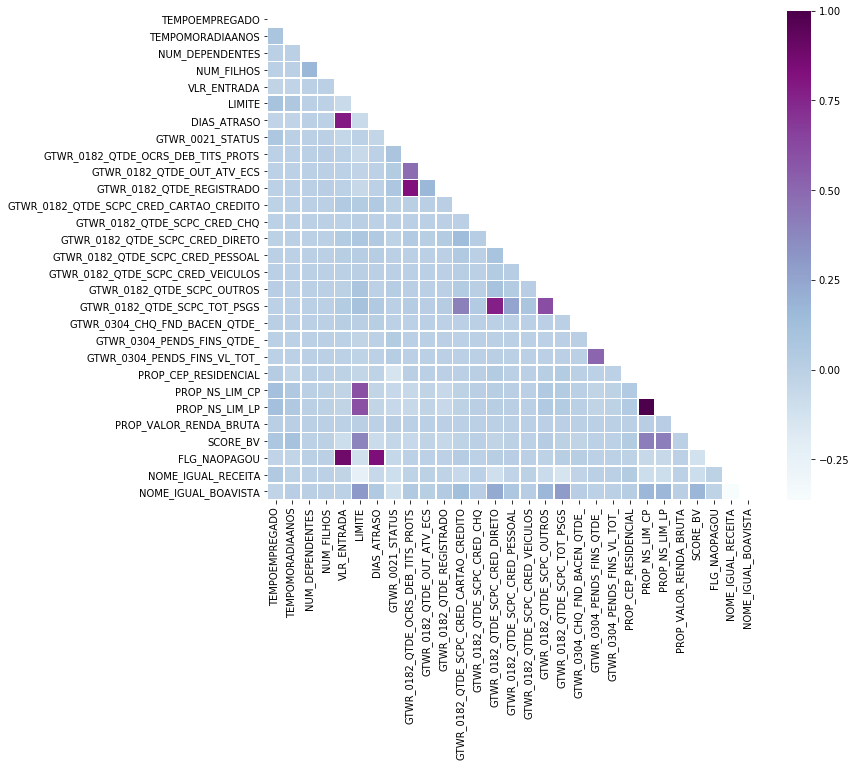

In [4]:
# Calcula a matriz de correlação
corr_all = dados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [93]:
dados = dados.drop(['PROP_NS_LIM_CP', 'PROP_NS_LIM_LP'], axis=1)

In [94]:
dados = dados.drop(['LOG_DH_INICIO', 'LOG_NM_POLITICA'], axis=1)

In [95]:
dados = dados.drop('DATACADASTRO', axis=1)

In [96]:
# Features removidas pois somente os clientes que atrasaram as possui, o que enviesa o modelo.
dados = dados.drop(['DIAS_ATRASO', 'VLR_ENTRADA'], axis=1)

In [97]:
#a = dados.apply(lambda x: x['PROP_CEP_RESIDENCIAL'][0:3], axis=1)
dados['PROP_CEP_RESIDENCIAL'] = dados.PROP_CEP_RESIDENCIAL.apply(lambda x: str(int(x)).zfill(8))

In [98]:
dados['PROP_CEP_RESIDENCIAL'].head()

0    06340180
1    08850090
2    09332100
3    06655620
4    04857190
Name: PROP_CEP_RESIDENCIAL, dtype: object

In [99]:
dados['CEP3'] = dados['PROP_CEP_RESIDENCIAL'].str[0:4]

In [100]:
dados[['CEP3', 'PROP_CEP_RESIDENCIAL']].head()

,CEP3,PROP_CEP_RESIDENCIAL
0,0634,06340180
1,0885,08850090
2,0933,09332100
3,0665,06655620
4,0485,04857190


In [101]:
# Removido o CEP para criação do modelo
dados = dados.drop('PROP_CEP_RESIDENCIAL', axis=1)

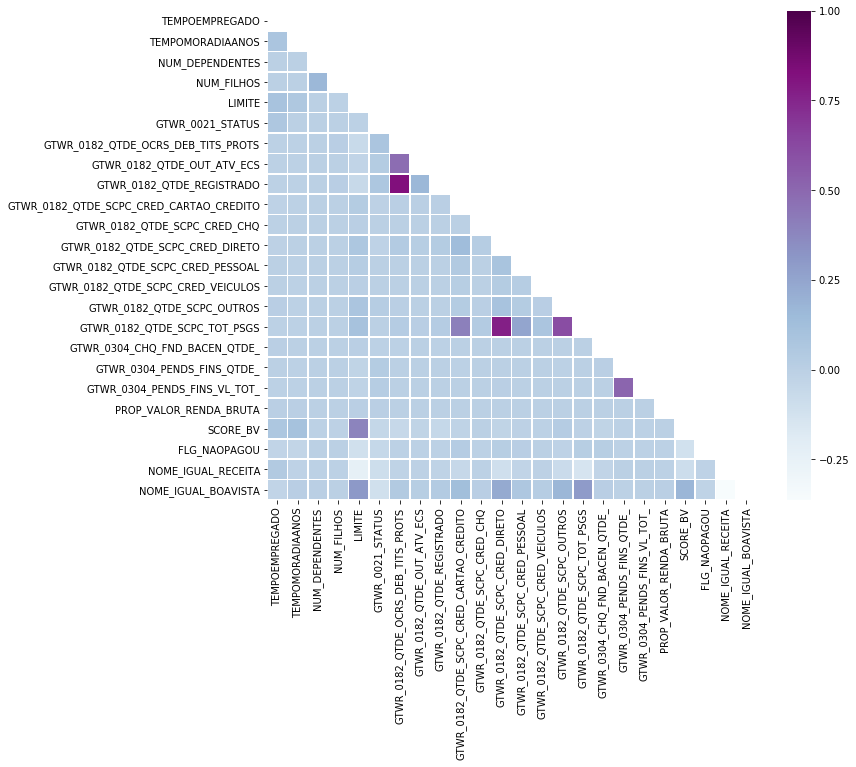

In [102]:
# Calcula a matriz de correlação
corr_all = dados.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [103]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dados_numericos = dados.select_dtypes(include=numerics)

In [104]:
dados_nao_numericos = dados.select_dtypes(exclude=numerics)

In [105]:
dados_numericos.head()

,TEMPOEMPREGADO,TEMPOMORADIAANOS,NUM_DEPENDENTES,NUM_FILHOS,LIMITE,GTWR_0021_STATUS,GTWR_0182_QTDE_OCRS_DEB_TITS_PROTS,GTWR_0182_QTDE_OUT_ATV_ECS,GTWR_0182_QTDE_REGISTRADO,GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO,...,GTWR_0182_QTDE_SCPC_OUTROS,GTWR_0182_QTDE_SCPC_TOT_PSGS,GTWR_0304_CHQ_FND_BACEN_QTDE_,GTWR_0304_PENDS_FINS_QTDE_,GTWR_0304_PENDS_FINS_VL_TOT_,PROP_VALOR_RENDA_BRUTA,SCORE_BV,FLG_NAOPAGOU,NOME_IGUAL_RECEITA,NOME_IGUAL_BOAVISTA
0,6,4,0,0,440,0,0,0,0,0,...,0,2,0,0,0.000000,1200.000000,548.000000,1,0,1
1,16,19,0,0,900,0,0,0,0,0,...,0,0,0,0,0.000000,2190.000000,579.000000,1,0,1
2,6,10,0,0,440,0,0,0,0,0,...,0,0,0,0,0.000000,1500.000000,571.000000,1,0,0
3,0,8,0,0,200,0,0,0,0,0,...,0,0,0,0,0.000000,1500.000000,468.000000,1,0,1
4,5,5,0,0,450,0,0,0,0,0,...,0,0,0,0,0.000000,1000.000000,606.000000,1,0,1


In [18]:
dados_nao_numericos.head()

,SEXO,ESCOLARIDADE,ESTADOCIVIL,PROFISSAO,MORADIA,OCUPACAO,POSSUIVEICULO,CASE_SCORE_X_LOJA,FLX_ACSP_VERIFICACAO_END,FLX_ANATEL,...,RGR_NAT_OCUP_SEM_TEL_PROF,RGR_NOME_MAE_CONFERE,RGR_RFPF_CPF_CANCELADO,RGR_RFPF_CPF_ENCONTRADO,RGR_RFPF_CPF_PENDENTE,RGR_RFPF_CPF_SUSPENSO,RGR_RFPF_NOME_CONFERE,RGR_RI_DDD_CLI_IGUAL_UF_RES,RGR_THSYSTEM_CEP_CONFERE,RGR_THSYSTEM_END_CONFERE
0,M,Até 1º grau completo,Solteiro,AUTÔNOMO,Própria,Autônomo,N,C,SEGUIR - A,SEGUIR - A,...,S,S,N,S,N,N,S,S,S,S
1,F,Superior (Completo),Casado,PROFESSOR DE ENSINO MÉDIO,Própria,Funcionário Publico,N,B-,SEGUIR - A,SEGUIR - A,...,MISSING,S,N,S,N,N,S,S,S,N
2,F,Até 2º grau completo,Casado,AUTÔNOMO,Própria,Autônomo,N,B-,SEGUIR - A,SEGUIR - A,...,S,S,N,S,N,N,S,S,S,S
3,M,Até 1º grau completo,Solteiro,AUTÔNOMO,Própria,Autônomo,N,D-,SEGUIR - A,SEGUIR - A,...,S,S,N,S,N,N,S,S,N,S
4,F,Superior (Incompleto),Solteiro,AUTÔNOMO,Alugada,Aposentado,N,B,SEGUIR - A,SEGUIR - A,...,S,S,N,S,N,N,S,S,S,S


In [27]:
list(dados)

['SEXO',
 'TEMPOEMPREGADO',
 'TEMPOMORADIAANOS',
 'ESCOLARIDADE',
 'ESTADOCIVIL',
 'PROFISSAO',
 'MORADIA',
 'OCUPACAO',
 'NUM_DEPENDENTES',
 'NUM_FILHOS',
 'POSSUIVEICULO',
 'LIMITE',
 'CASE_SCORE_X_LOJA',
 'FLX_ACSP_VERIFICACAO_END',
 'FLX_ANATEL',
 'FLX_IRPF',
 'FLX_PRINCIPAL',
 'FLX_RECEITA_FEDERAL_PF',
 'FLX_RESTRICAO_INTERNA',
 'GTWR_0001_SITUACAO_CADASTRAL',
 'GTWR_0021_SITUACAO_DECLARACAO',
 'GTWR_0021_STATUS',
 'GTWR_0021_TEM_DEBS',
 'GTWR_0021_TEM_RESTITUICAO',
 'GTWR_0182_EXISTE_NDAC_DOCS_SOLICS',
 'GTWR_0182_QTDE_OCRS_DEB_TITS_PROTS',
 'GTWR_0182_QTDE_OUT_ATV_ECS',
 'GTWR_0182_QTDE_REGISTRADO',
 'GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO',
 'GTWR_0182_QTDE_SCPC_CRED_CHQ',
 'GTWR_0182_QTDE_SCPC_CRED_DIRETO',
 'GTWR_0182_QTDE_SCPC_CRED_PESSOAL',
 'GTWR_0182_QTDE_SCPC_CRED_VEICULOS',
 'GTWR_0182_QTDE_SCPC_OUTROS',
 'GTWR_0182_QTDE_SCPC_TOT_PSGS',
 'GTWR_0304_CHQ_FND_BACEN_QTDE_',
 'GTWR_0304_PENDS_FINS_QTDE_',
 'GTWR_0304_PENDS_FINS_VL_TOT_',
 'PROP_VALOR_RENDA_BRUTA',
 'RGR_ACS

In [26]:
dados.describe()

,TEMPOEMPREGADO,TEMPOMORADIAANOS,NUM_DEPENDENTES,NUM_FILHOS,LIMITE,GTWR_0021_STATUS,GTWR_0182_QTDE_OCRS_DEB_TITS_PROTS,GTWR_0182_QTDE_OUT_ATV_ECS,GTWR_0182_QTDE_REGISTRADO,GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO,...,GTWR_0182_QTDE_SCPC_OUTROS,GTWR_0182_QTDE_SCPC_TOT_PSGS,GTWR_0304_CHQ_FND_BACEN_QTDE_,GTWR_0304_PENDS_FINS_QTDE_,GTWR_0304_PENDS_FINS_VL_TOT_,PROP_VALOR_RENDA_BRUTA,SCORE_BV,FLG_NAOPAGOU,NOME_IGUAL_RECEITA,NOME_IGUAL_BOAVISTA
count,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,...,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000
mean,3.845946,12.197826,0.000342,0.000757,609.590563,0.430450,0.005362,0.000616,0.003308,0.012441,...,0.032375,0.102852,0.020885,0.002195,2.909256,1808.390161,679.341326,0.035234,0.244337,0.290018
std,5.257632,9.545690,0.020890,0.036002,291.515207,0.692132,0.153732,0.041986,0.107224,0.124242,...,0.230439,0.434705,0.411506,0.149177,314.591098,21665.915972,152.119586,0.184372,0.429694,0.453771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,678.790000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,585.000000,0.000000,0.000000,0.000000
50%,2.000000,10.000000,0.000000,0.000000,570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,679.341326,0.000000,0.000000,0.000000
75%,6.000000,16.000000,0.000000,0.000000,780.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,792.000000,0.000000,0.000000,1.000000
max,67.000000,78.000000,2.000000,4.000000,2000.000000,2.000000,18.000000,7.000000,16.000000,6.000000,...,7.000000,17.000000,34.000000,54.000000,64128.050000,10003000.000000,999.000000,1.000000,1.000000,1.000000


In [106]:
X = pd.concat([dados_numericos, pd.get_dummies(dados_nao_numericos)], axis=1)

In [22]:
X.head()

,TEMPOEMPREGADO,TEMPOMORADIAANOS,NUM_DEPENDENTES,NUM_FILHOS,LIMITE,GTWR_0021_STATUS,GTWR_0182_QTDE_OCRS_DEB_TITS_PROTS,GTWR_0182_QTDE_OUT_ATV_ECS,GTWR_0182_QTDE_REGISTRADO,GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO,...,RGR_RFPF_CPF_PENDENTE_S,RGR_RFPF_CPF_SUSPENSO_N,RGR_RFPF_NOME_CONFERE_N,RGR_RFPF_NOME_CONFERE_S,RGR_RI_DDD_CLI_IGUAL_UF_RES_N,RGR_RI_DDD_CLI_IGUAL_UF_RES_S,RGR_THSYSTEM_CEP_CONFERE_N,RGR_THSYSTEM_CEP_CONFERE_S,RGR_THSYSTEM_END_CONFERE_N,RGR_THSYSTEM_END_CONFERE_S
0,6,4,0,0,440,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,16,19,0,0,900,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
2,6,10,0,0,440,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,0,8,0,0,200,0,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
4,5,5,0,0,450,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1


In [107]:
y = dados.FLG_NAOPAGOU

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
dados_numericos.describe()

,TEMPOEMPREGADO,TEMPOMORADIAANOS,NUM_DEPENDENTES,NUM_FILHOS,LIMITE,GTWR_0021_STATUS,GTWR_0182_QTDE_OCRS_DEB_TITS_PROTS,GTWR_0182_QTDE_OUT_ATV_ECS,GTWR_0182_QTDE_REGISTRADO,GTWR_0182_QTDE_SCPC_CRED_CARTAO_CREDITO,...,GTWR_0304_CHQ_FND_BACEN_QTDE_,GTWR_0304_PENDS_FINS_QTDE_,GTWR_0304_PENDS_FINS_VL_TOT_,PROP_NS_LIM_CP,PROP_NS_LIM_LP,PROP_VALOR_RENDA_BRUTA,SCORE_BV,FLG_NAOPAGOU,NOME_IGUAL_RECEITA,NOME_IGUAL_BOAVISTA
count,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,...,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000,233665.000000
mean,3.845946,12.197826,0.000342,0.000757,609.590563,0.430450,0.005362,0.000616,0.003308,0.012441,...,0.020885,0.002195,2.909256,496.194714,496.194714,1808.390161,679.341326,0.035234,0.244337,0.290018
std,5.257632,9.545690,0.020890,0.036002,291.515207,0.692132,0.153732,0.041986,0.107224,0.124242,...,0.411506,0.149177,314.591098,214.768098,214.768098,21665.915972,152.119586,0.184372,0.429694,0.453771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,678.790000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,440.000000,440.000000,1200.000000,585.000000,0.000000,0.000000,0.000000
50%,2.000000,10.000000,0.000000,0.000000,570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,440.000000,440.000000,1500.000000,679.341326,0.000000,0.000000,0.000000
75%,6.000000,16.000000,0.000000,0.000000,780.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,600.000000,600.000000,2000.000000,792.000000,0.000000,0.000000,1.000000
max,67.000000,78.000000,2.000000,4.000000,2000.000000,2.000000,18.000000,7.000000,16.000000,6.000000,...,34.000000,54.000000,64128.050000,900.000000,900.000000,10003000.000000,999.000000,1.000000,1.000000,1.000000


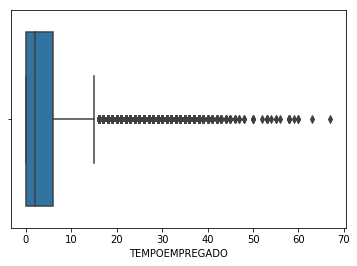

In [31]:
sns.boxplot(dados['TEMPOEMPREGADO'])

In [43]:
y_train.value_counts()

0    157740
1      5825
Name: FLG_NAOPAGOU, dtype: int64

In [44]:
y_test.value_counts()

0    67692
1     2408
Name: FLG_NAOPAGOU, dtype: int64

## Regressão Logística

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lo = LogisticRegression(C=10)

In [34]:
lo.fit(X_train, y_train)
predictions = lo.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 1.0000


In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)

MSE: 0.0000


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

R2: 1.0000


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
acc = roc_auc_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 1.0000


## Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [48]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [49]:
predictions = mlp.predict(X_test)

In [50]:
probs = mlp.predict_proba(X_test)

In [51]:
from sklearn.metrics import roc_auc_score
auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

AUC: 0.9996


In [52]:
from sklearn.metrics import accuracy_score
print("acurácia: %.4f" % accuracy_score(y_test, predictions))

acurácia: 0.9999


## Downsampling

In [109]:
# Separate majority and minority classes
maior_classe = dados[dados.FLG_NAOPAGOU == 0]
menor_classe = dados[dados.FLG_NAOPAGOU == 1]

In [110]:
menor_classe.count()[0]

8233

In [111]:
# Downsample majority class
maior_classe_downsampled = resample(maior_classe, 
                                 replace=False,    # sample without replacement
                                 n_samples=menor_classe.count()[0],     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
dados_downsampled = pd.concat([maior_classe_downsampled, menor_classe])
 
# Display new class counts
dados_downsampled.FLG_NAOPAGOU.value_counts()

1    8233
0    8233
Name: FLG_NAOPAGOU, dtype: int64

In [112]:
dados_downsampled.shape

(16466, 65)

In [113]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dados_numericos = dados_downsampled.select_dtypes(include=numerics)

In [114]:
dados_nao_numericos = dados_downsampled.select_dtypes(exclude=numerics)

In [115]:
X = pd.concat([dados_numericos, pd.get_dummies(dados_nao_numericos)], axis=1)

In [116]:
y = dados_downsampled.FLG_NAOPAGOU

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
X_train.count()[0]

11526

In [119]:
y_train.value_counts()

1    5777
0    5749
Name: FLG_NAOPAGOU, dtype: int64

## Regressão Logística

In [65]:
lo = LogisticRegression(C=10)

In [66]:
lo.fit(X_train, y_train)
predictions = lo.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 1.0000


In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)

MSE: 0.0000


In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

R2: 1.0000


In [69]:
auc_ = roc_auc_score(y_test, predictions)
print("AUC: %.4f" % auc_)

AUC: 1.0000


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
acc = roc_auc_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 1.0000


## Neural Network

In [72]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [73]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
predictions = mlp.predict(X_test)

In [75]:
probs = mlp.predict_proba(X_test)

In [76]:
from sklearn.metrics import roc_auc_score
auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

AUC: 0.9997


In [77]:
from sklearn.metrics import accuracy_score
print("acurácia: %.4f" % accuracy_score(y_test, predictions))

acurácia: 0.9923


## Ajustando a escala dos dados

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [121]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Regressão Logística

In [122]:
lo = LogisticRegression(C=10)

In [123]:
lo.fit(X_train, y_train)
predictions = lo.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 1.0000


In [124]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("MSE: %.4f" % mse)

MSE: 0.0000


In [125]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R2: %.4f" % r2)

R2: 1.0000


In [126]:
auc_ = roc_auc_score(y_test, predictions)
print("AUC: %.4f" % auc_)

AUC: 1.0000


# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
acc = roc_auc_score(y_test, predictions)
print("accuracy_score: %.4f" % acc)

accuracy_score: 1.0000


## Neural Network

In [130]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [131]:
predictions = mlp.predict(X_test)

In [132]:
probs = mlp.predict_proba(X_test)

In [133]:
from sklearn.metrics import roc_auc_score
auc_ = roc_auc_score(y_test, probs[:,1])
print("AUC: %.4f" % auc_)

AUC: 0.9815


In [134]:
from sklearn.metrics import accuracy_score
print("acurácia: %.4f" % accuracy_score(y_test, predictions))

acurácia: 0.9769


In [135]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2423   61]
 [  53 2403]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2484
          1       0.98      0.98      0.98      2456

avg / total       0.98      0.98      0.98      4940



### Cross Validation e Grid Search

In [138]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [139]:
tuned_parameters = [{'hidden_layer_sizes': [(1,), (5,), (10,), (5,5,)],
                     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                     'learning_rate': ['constant', 'adaptive'],
                     'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}]

In [140]:
clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=3)
clf.fit(X_train, y_train)

C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\joaoh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(1,), (5,), (10,), (5, 5)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test, clf.predict(X_test)))
print()

Best parameters set found on development set:

{'activation': 'identity', 'alpha': 1, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant'}

Grid scores on development set:

0.971 (+/-0.004) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant'}
0.966 (+/-0.007) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (1,), 'learning_rate': 'adaptive'}
0.973 (+/-0.006) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant'}
0.970 (+/-0.006) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'adaptive'}
0.971 (+/-0.002) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.972 (+/-0.003) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.967 (+/-0.002) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5

In [142]:
params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2484
          1       1.00      1.00      1.00      2456

avg / total       1.00      1.00      1.00      4940



In [143]:
tuned_parameters = [{'n_estimators': [10, 100, 300],
                     'max_depth' : [3, 10],
                     'min_samples_split': [2, 10],
                     'learning_rate': [0.001, 0.1], 
                     'subsample': [0.5, 1]}]

In [144]:
clf = GridSearchCV(ensemble.GradientBoostingClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, clf.predict(X_test)))
print()

## Continua executando a partir daqui

In [152]:
# Separate majority and minority classes
maior_classe = dados[dados.FLG_NAOPAGOU == 0]
menor_classe = dados[dados.FLG_NAOPAGOU == 1]

In [153]:
menor_classe.count()[0]

8233

In [154]:
# Downsample majority class
maior_classe_downsampled = resample(maior_classe, 
                                 replace=False,    # sample without replacement
                                 n_samples=menor_classe.count()[0],     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
dados_downsampled = pd.concat([maior_classe_downsampled, menor_classe])
 
# Display new class counts
dados_downsampled.FLG_NAOPAGOU.value_counts()

1    8233
0    8233
Name: FLG_NAOPAGOU, dtype: int64

In [155]:
dados_downsampled.shape

(16466, 67)

In [156]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dados_numericos = dados_downsampled.select_dtypes(include=numerics)

In [157]:
dados_nao_numericos = dados_downsampled.select_dtypes(exclude=numerics)

In [158]:
X = pd.concat([dados_numericos, pd.get_dummies(dados_nao_numericos)], axis=1)

In [159]:
y = dados_downsampled.FLG_NAOPAGOU

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [161]:
X_train.count()[0]

11526

In [162]:
y_train.value_counts()

1    5777
0    5749
Name: FLG_NAOPAGOU, dtype: int64

In [163]:
tuned_parameters = [{'hidden_layer_sizes': [(1,), (5,), (10,), (5,5,)],
                     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                     'learning_rate': ['constant', 'adaptive'],
                     'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}]

In [164]:
clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'hidden_layer_sizes': [(1,), (5,), (10,), (5, 5)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'adaptive'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, clf.predict(X_test)))
print()

Best parameters set found on development set:

{'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 5), 'learning_rate': 'adaptive'}

Grid scores on development set:

0.496 (+/-0.018) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant'}
0.495 (+/-0.014) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (1,), 'learning_rate': 'adaptive'}
0.509 (+/-0.031) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant'}
0.501 (+/-0.006) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'adaptive'}
0.499 (+/-0.002) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.499 (+/-0.005) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.500 (+/-0.015) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_siz

In [166]:
params = {'n_estimators': 500, 'max_depth': 2, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2484
          1       1.00      1.00      1.00      2456

avg / total       1.00      1.00      1.00      4940



In [167]:
tuned_parameters = [{'n_estimators': [10, 100, 300],
                     'max_depth' : [3, 10],
                     'min_samples_split': [2, 10],
                     'learning_rate': [0.001, 0.1], 
                     'subsample': [0.5, 1]}]

In [168]:
clf = GridSearchCV(ensemble.GradientBoostingClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 100, 300], 'max_depth': [3, 10], 'min_samples_split': [2, 10], 'learning_rate': [0.001, 0.1], 'subsample': [0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, clf.predict(X_test)))
print()

Best parameters set found on development set:

{'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.5}

Grid scores on development set:

1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.5}
1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 1}
1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.5}
1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}
1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.5}
1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1}
1.000 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'min_samples

## Cluster using K-Means

## Downsampling

In [49]:
# Removido o CEP para criação do modelo
# Features removidas pois somente os clientes que atrasaram as possui, o que enviesa o modelo (DIAS_ATRASO e VLR_ENTRADA).
dados = dados.drop(['DATACADASTRO', 'PROP_CEP_RESIDENCIAL', 'LOG_DH_INICIO', 'LOG_NM_POLITICA', 'PROP_CEP_RESIDENCIAL', 
                    'DIAS_ATRASO', 'VLR_ENTRADA'], axis=1)

In [102]:
# Separate majority and minority classes
maior_classe = dados[dados.FLG_NAOPAGOU == 0]
menor_classe = dados[dados.FLG_NAOPAGOU == 1]

# Downsample majority class
maior_classe_downsampled = resample(maior_classe, 
                                 replace=False,    # sample without replacement
                                 n_samples=menor_classe.count()[0],     # to match minority class
                                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
dados_downsampled = pd.concat([maior_classe_downsampled, menor_classe])
 
# Display new class counts
dados_downsampled.FLG_NAOPAGOU.value_counts()

1    8233
0    8233
Name: FLG_NAOPAGOU, dtype: int64

In [148]:
dados_downsampled.shape

(16466, 65)

In [104]:
dados_downsampled.head(1)

,SEXO,TEMPOEMPREGADO,TEMPOMORADIAANOS,ESCOLARIDADE,ESTADOCIVIL,PROFISSAO,MORADIA,OCUPACAO,NUM_DEPENDENTES,NUM_FILHOS,...,RGR_RFPF_CPF_SUSPENSO,RGR_RFPF_NOME_CONFERE,RGR_RI_DDD_CLI_IGUAL_UF_RES,RGR_THSYSTEM_CEP_CONFERE,RGR_THSYSTEM_END_CONFERE,SCORE_BV,FLG_NAOPAGOU,NOME_IGUAL_RECEITA,NOME_IGUAL_BOAVISTA,CEP3
78156,M,5,12,Até 2º grau completo,Casado,OUTROS,Própria,Empregado,0,0,...,N,S,S,S,S,679.341326,0,0,0,000


In [140]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dados_numericos = dados_downsampled.select_dtypes(include=numerics)

In [141]:
dados_nao_numericos = dados_downsampled.select_dtypes(exclude=numerics)

In [142]:
X = pd.concat([dados_numericos, pd.get_dummies(dados_nao_numericos)], axis=1)

In [143]:
X_cluster = X

In [144]:
y = dados_downsampled.FLG_NAOPAGOU

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit_transform(X_cluster)

array([[ 0.33131295,  0.06645511, -0.01742837, ..., -0.00779326,
        -0.00779326, -0.00779326],
       [ 4.96488485,  0.39824706, -0.01742837, ..., -0.00779326,
        -0.00779326, -0.00779326],
       [ 0.12069605, -0.04414221, -0.01742837, ..., -0.00779326,
        -0.00779326, -0.00779326],
       ...,
       [-0.08992086, -0.48653148, -0.01742837, ..., -0.00779326,
        -0.00779326, -0.00779326],
       [ 0.33131295, -1.2607127 , -0.01742837, ..., -0.00779326,
        -0.00779326, -0.00779326],
       [-0.08992086, -0.48653148, -0.01742837, ..., -0.00779326,
        -0.00779326, -0.00779326]])

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.cluster import KMeans

In [60]:
cluster = KMeans(n_clusters=3, random_state=42, n_jobs=-1)

In [114]:
cluster.fit(X_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [62]:
cluster.labels_

array([2, 0, 2, ..., 2, 2, 2])

In [147]:
X['cluster'] = cluster.labels_

NameError: name 'cluster' is not defined

In [118]:
X.cluster.value_counts()

0    10822
2     5222
1      422
Name: cluster, dtype: int64

In [146]:
X.cluster.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [145]:
print('teste')

teste
